# Analysis of Titanic Survivors

![](https://upload.wikimedia.org/wikipedia/commons/6/6e/St%C3%B6wer_Titanic.jpg)

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.DataFrame(pd.read_csv('D:/All_datasets/Titanic/Titanic Survivors Dataset.csv'))
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Desscription of the attributes of the Dataset**

* pClass: Passenger Class(1 = 1st; 2 = 2nd; 3 = 3rd)
* survival: Survival (0 = No; 1 = Yes)
* name: Name
* sex: Sex
* age: Age
* sibsp: No. of Siblings/Spouses Aboard
* parch: No. of Parents/Children Aboard
* ticket: Ticket No.
* fare: Passenger Fare (British Pound)
* cabin: Cabin
* embarked: Port of Embarkation: (C = Cherbourg; Q = Queenstown; S = Southampton)


In [3]:
df.shape

(891, 12)



*   There are a total of 891 entries and 12 columns in the dataset


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64



*   The Dataset is not complete i.e. it has empty cells in it

In [5]:
x = df.isnull().sum()

drop_col = x[x>(0.35 * df.shape[0])]
drop_col

Cabin    687
dtype: int64

* Cabin column has the highes tno of empty cells.

In [6]:
drop_col.index

Index(['Cabin'], dtype='object')

In [7]:
df.drop(drop_col.index, axis=1, inplace=True)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

Dataset after dropping the column with highest no. of null values in it.

In [8]:
df.fillna(df.mean(), inplace=True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

Replacing the leftover null values with the mean values

In [9]:
df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [10]:
df['Embarked'].fillna('S',inplace=True)

Replacing the null values in the String Columns with 'S'

In [11]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

No Null Values left

In [12]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


*   The fare charge increases with the increase in class i.e the Fare Charges and the Class of Travel have a positive correclation 

In [13]:
df['FamilySize'] = df['SibSp']+df['Parch']
df.drop(['SibSp', 'Parch'], axis=1, inplace=True)
df.corr()

,PassengerId,Survived,Pclass,Age,Fare,FamilySize
PassengerId,1.000000,-0.005007,-0.035144,0.033207,0.012658,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.069809,0.257307,0.016639
Pclass,-0.035144,-0.338481,1.000000,-0.331339,-0.549500,0.065997
Age,0.033207,-0.069809,-0.331339,1.000000,0.091566,-0.248512
Fare,0.012658,0.257307,-0.549500,0.091566,1.000000,0.217138
FamilySize,-0.040143,0.016639,0.065997,-0.248512,0.217138,1.000000


In [14]:
df['Alone'] = [0 if df['FamilySize'][i]>0 else 1 for i in df.index]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,FamilySize,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0,1


In [15]:
df.groupby(['Alone'])['Survived'].mean()

Alone
0    0.505650
1    0.303538
Name: Survived, dtype: float64

*   People who travelled along with Family had higher chance of survival


In [16]:
df[['Alone','Fare']].corr()

,Alone,Fare
Alone,1.000000,-0.271832
Fare,-0.271832,1.000000


In [17]:
df['Sex'] = [0 if df['Sex'][i] == 'male' else 1 for i in df.index]  # 0 = male, 1 = female
df.groupby(['Sex'])['Survived'].mean()

Sex
0    0.188908
1    0.742038
Name: Survived, dtype: float64

*   Females were prioritized over Men

In [18]:
df.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64



*   People who boarded from Cherbourg had higher survival rate


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


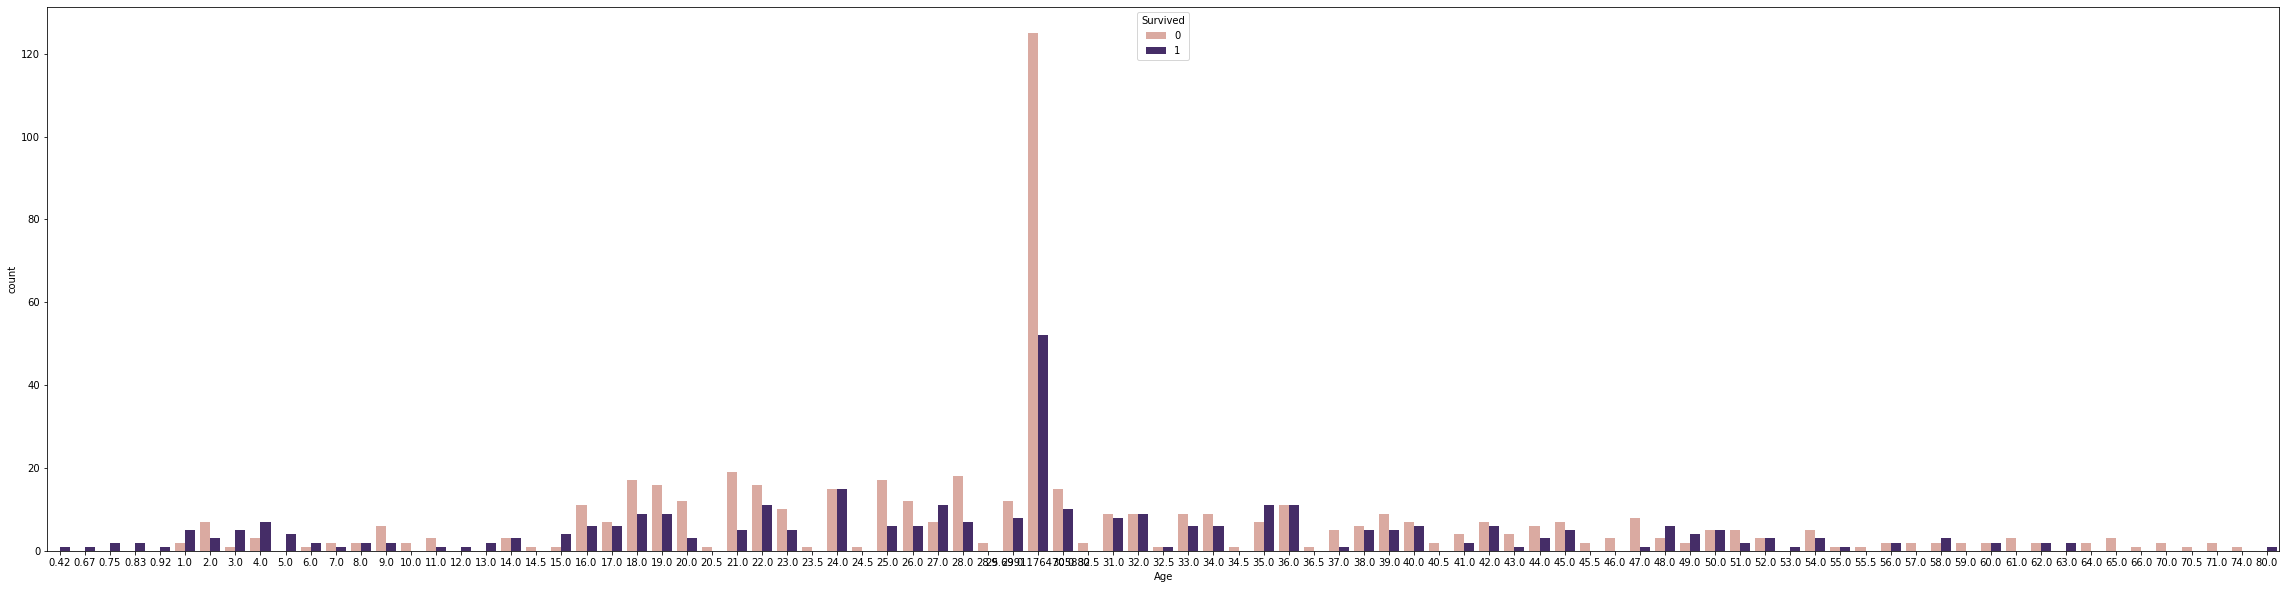

In [23]:
plt.figure(figsize=(40,10))
sns.countplot('Age',hue='Survived',data=df,palette=['#E4A497','#432371'])
plt.show()

It can be clearly observed that the number of candidates around 30 years of age, but it does not seem like a contributing factor for this age range.

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


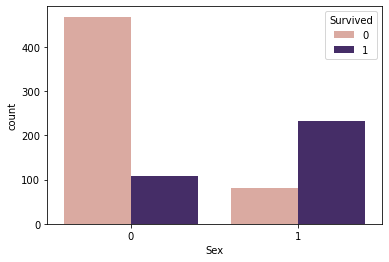

In [26]:
sns.countplot('Sex',hue='Survived',data=df,palette=['#E4A497','#432371'])
plt.show()

From the above plot, it is clear that the survival percentage of women higher as compared to men.

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


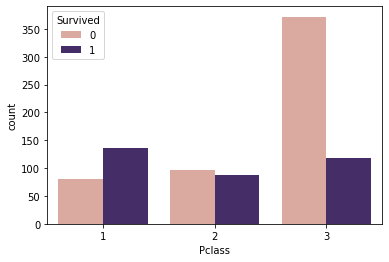

In [27]:
sns.countplot('Pclass',hue='Survived',data=df,palette=['#E4A497','#432371'])
plt.show()

From the above plot, one can observe that People of 3rd class have really less survival percentage, class 2 doesn't have much difference, but class1 people have more survival percentage in comparison to total class 1 passengers.

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


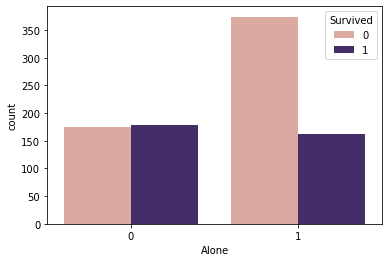

In [28]:
sns.countplot('Alone',hue='Survived',data=df,palette=['#E4A497','#432371'])
plt.show()

So people who were traveeling alone and didn't have family had less survival percentage as compared to those with Family.

Text(0.5, 1.0, 'Percentage of Passengers based on Survival')

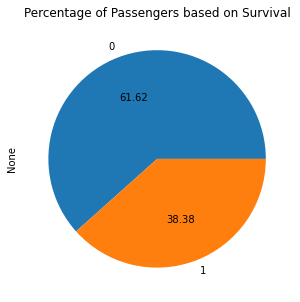

In [41]:
pie_data=df.groupby('Survived').size().plot(kind='pie', autopct='%.2f', figsize=(5,5))
pie_data.set_title("Percentage of Passengers based on Survival")

### **CONCLUSION**



*   Female Passengers were given more preferance than Male
*   People with High Class or Rich People had higher chance of Survival
*   Passengers with their family onboard had higher Survival Rates
*   Passengers boparding the ship from Cherbourg had the highest no. of survival rates as compared to the ones from Queenstown & Southampton




